# Index   

0. [Importing libraries](#-0.-Importing-libraries) 

1. [Exploratory Data Analysis](#-1.-Exploratory-Data-Analysis)

2. [Building the Convolutional Neuronal Network](#2.-Convolutional-Neuronal-Network)
    
    2.1. [Screenig of several pretrained models as base of the CNN](##-2.1-Screenig-of-several-pretrained-models-as-base-of-the-CNN)

    2.2. [Study individual CNNs](##-2.2.-Study-individual-CNNs)


3. [Predictions](#-3.-Predicitons)
 
4. [New Image implementation with web scrapping](#-4.-New-Image-implementation-with-web-scrapping)

5. [Xception trained with extended images](#-5.-Xception-trained-with-extended-images)

6. [Results & Conclusions](#-6.-Results-&-Conclusions)

7. [References](#-7.-References)

8. [Other](#-8.-Other)

# 0. Importing libraries

In [2]:
#Data exploration & manipulation
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.style as style 
import datetime as dt
import os
import matplotlib.pyplot as plt
import sweetviz as sv


print('sweetviz: %s' % sv.__version__) # print version

#ML Models search and optimisation
from pycaret.classification import * 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import optuna
print('optuna: %s' % optuna.__version__) # print version
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedKFold, GridSearchCV


%matplotlib inline



# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version




# Sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedShuffleSplit # to split stratified 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA

# Visualization
import matplotlib.image as mpimg
import plotly.io as pio #To fix an issue with the renderer of graphs in VSC
pio.renderers
import matplotlib 
import matplotlib.pyplot as plt # for showing images
print('matplotlib: %s' % matplotlib.__version__) # print version
import random
import seaborn as sns
sns.set_style('white') 


# Other utilities
import sys
import os
from platform import python_version
import datetime
from time import localtime, strftime, gmtime
import pathlib
from glob import glob
from tqdm import tqdm


print('python version: %s' % python_version()) # print version

sweetviz: 2.1.4
optuna: 2.10.0
pandas: 1.3.5
numpy: 1.19.5
sklearn: 0.23.2
matplotlib: 3.5.1
python version: 3.7.12


# 1. Exploratory Data Analysis

In [3]:
# Import initial files from the website

acad_Yield_train = pd.read_csv("https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Talent+Squad+League/3rd_batch/data/train.csv", index_col='Unnamed: 0')

acad_Yield_test = pd.read_csv("https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Talent+Squad+League/3rd_batch/data/test.csv", index_col='Unnamed: 0')

In [4]:
acad_Yield_train

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
764,female,1,standard,none,62,76,67
866,male,4,standard,none,79,57,58
208,female,2,standard,none,77,86,84
337,female,0,free/reduced,none,45,46,49
323,male,3,standard,completed,82,83,85
...,...,...,...,...,...,...,...
272,male,0,standard,completed,74,71,65
853,male,2,standard,completed,72,72,72
894,male,3,standard,none,86,77,78
179,male,0,standard,completed,89,87,86


In [5]:
acad_Yield_train.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Let's do a fast exploration of train and test dataset with the library sweetviz.m

In [6]:
feature_config = sv.FeatureConfig(force_num=["math score", "reading score", "writing score", "parental level of education"], force_cat=["gender", "lunch", "test preparation course"])

In [7]:
#analyzing the training dataset

acad_Yield_train_report = sv.analyze(acad_Yield_train, target_feat = 'parental level of education', feat_cfg=feature_config) 

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



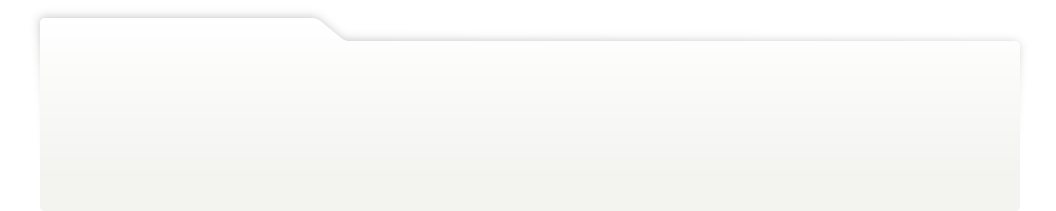
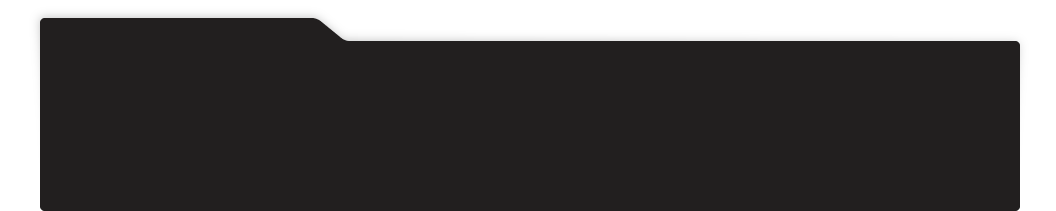
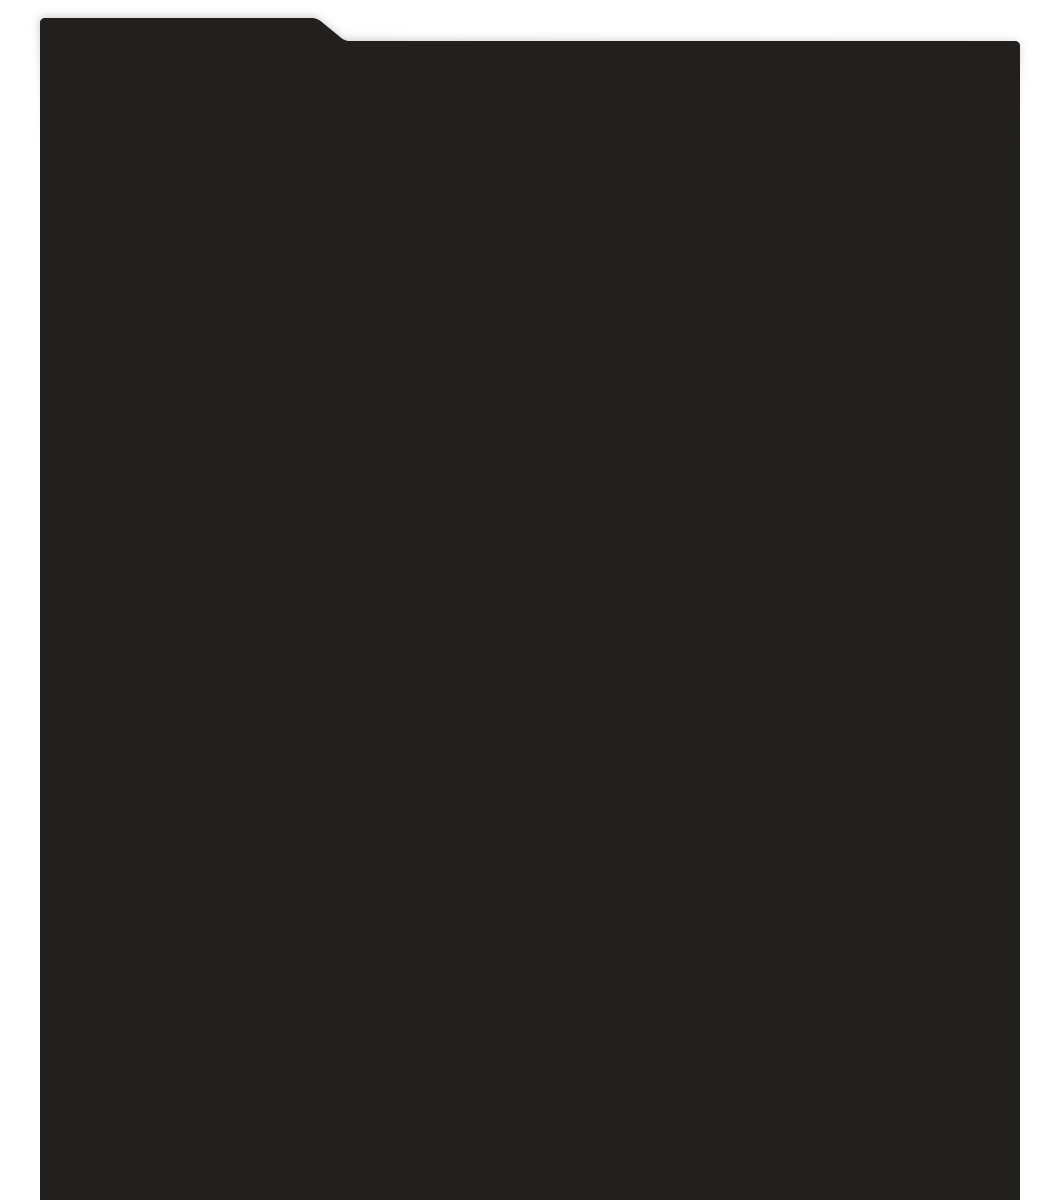
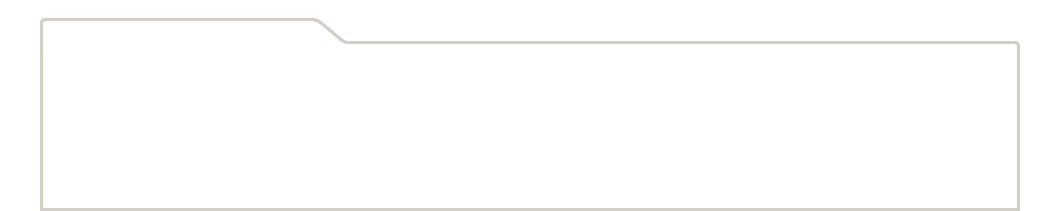
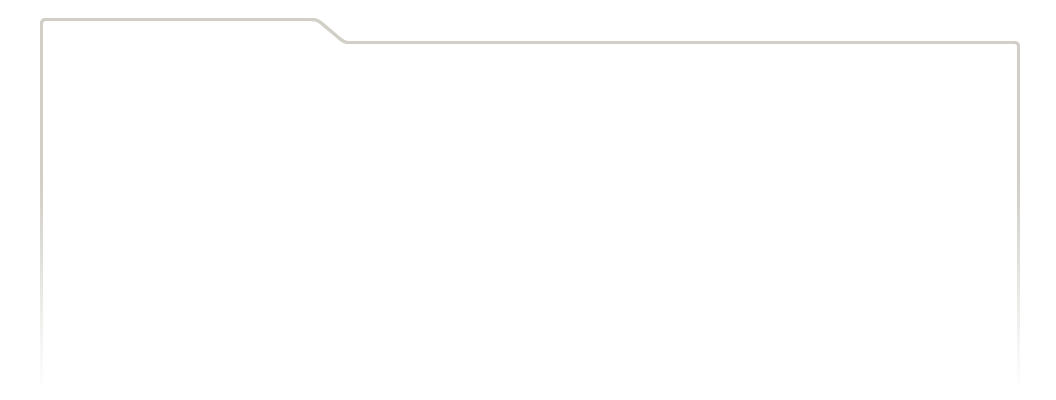
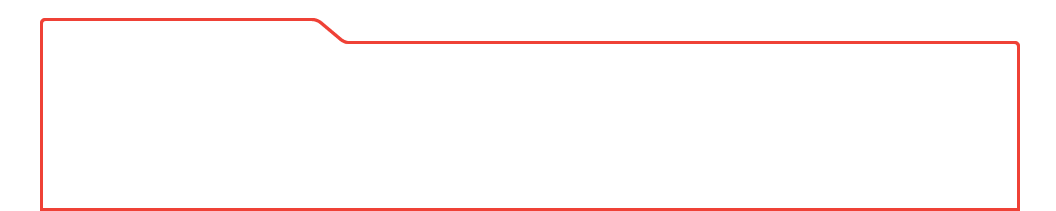
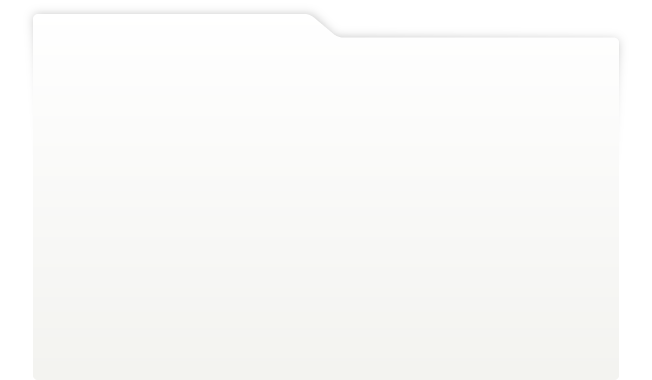
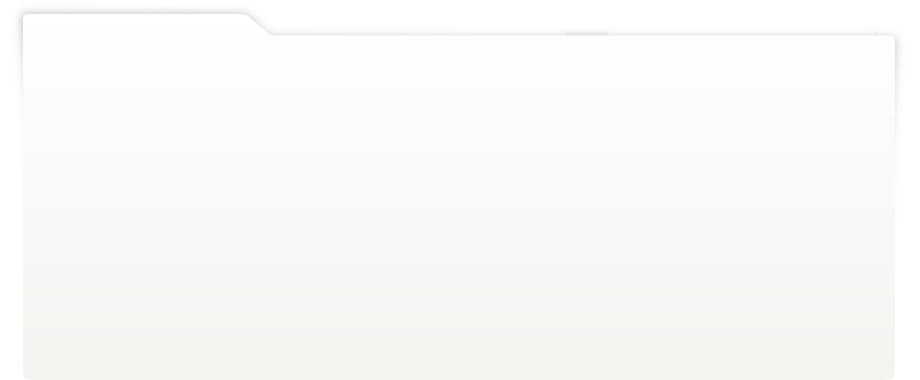
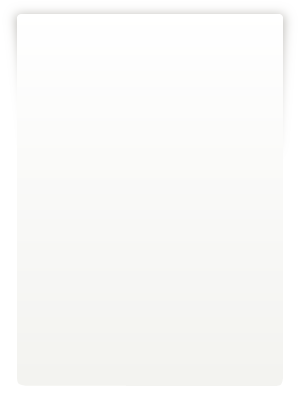
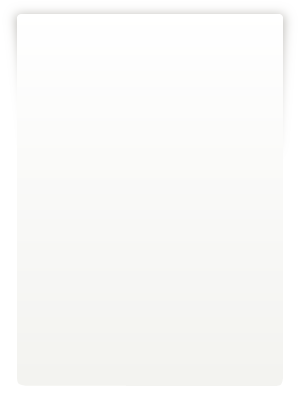
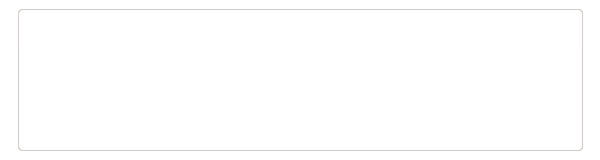
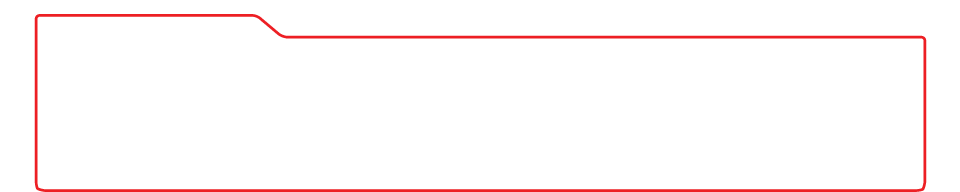
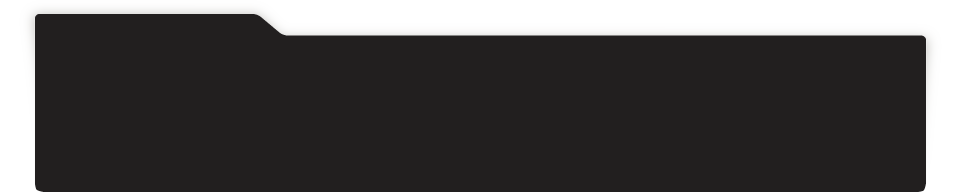
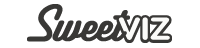
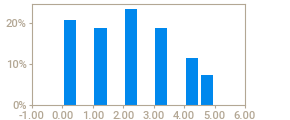
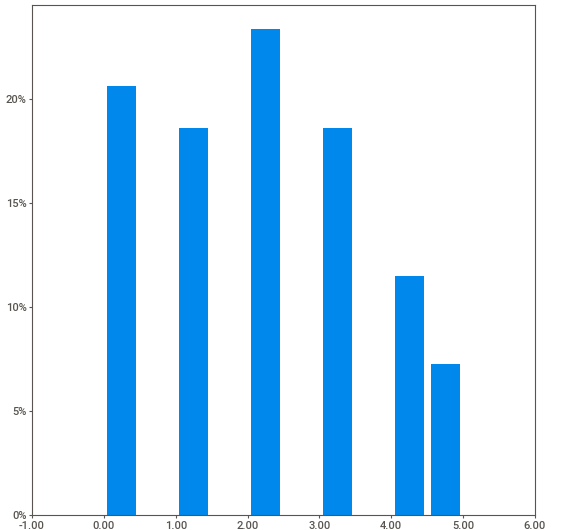
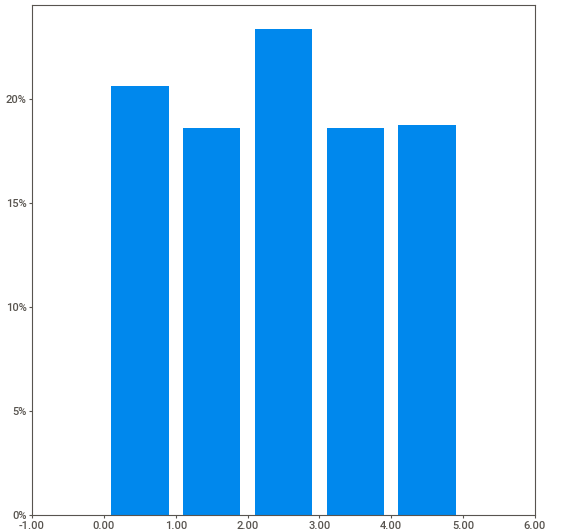
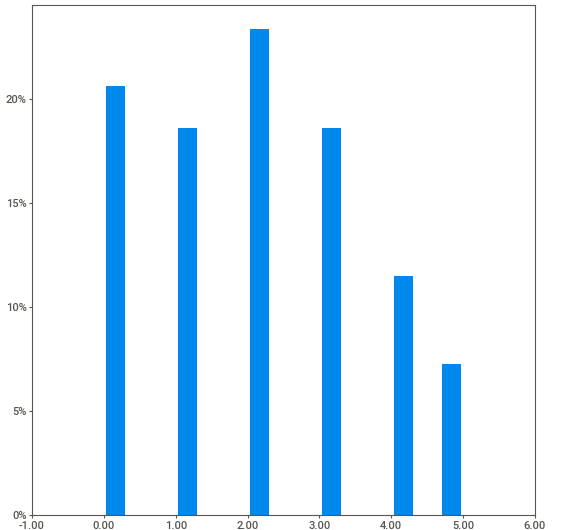
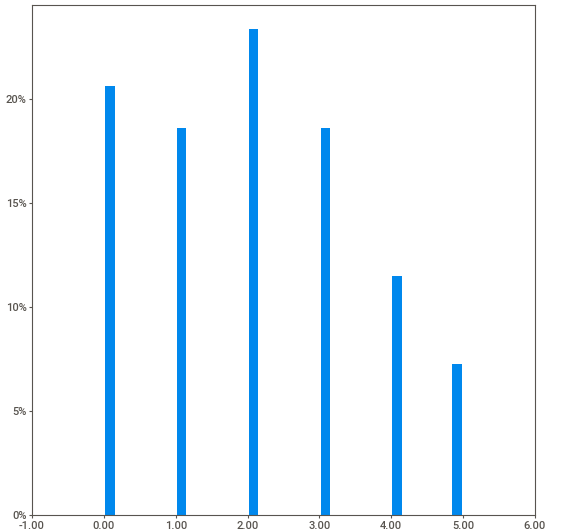
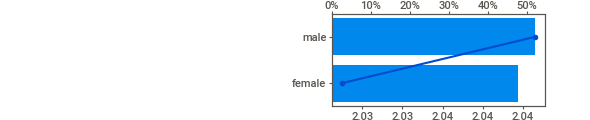
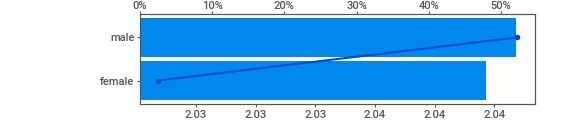
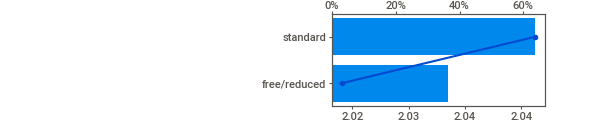
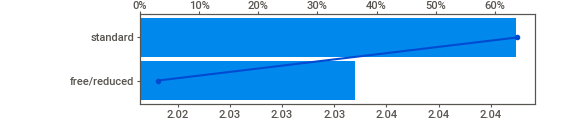
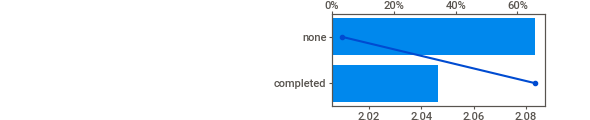
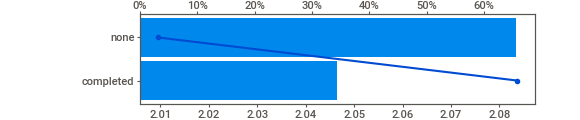
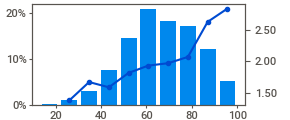
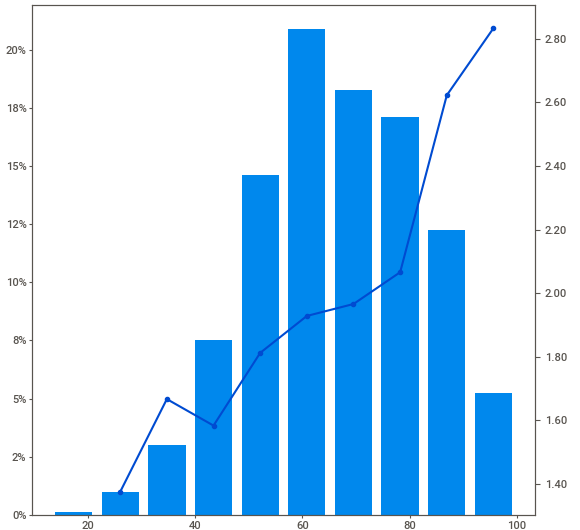
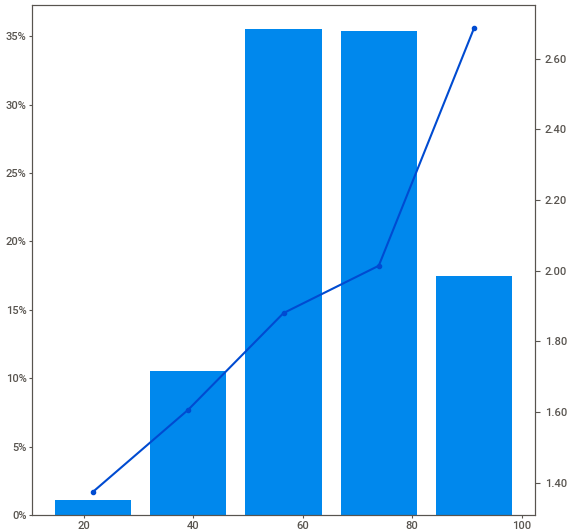
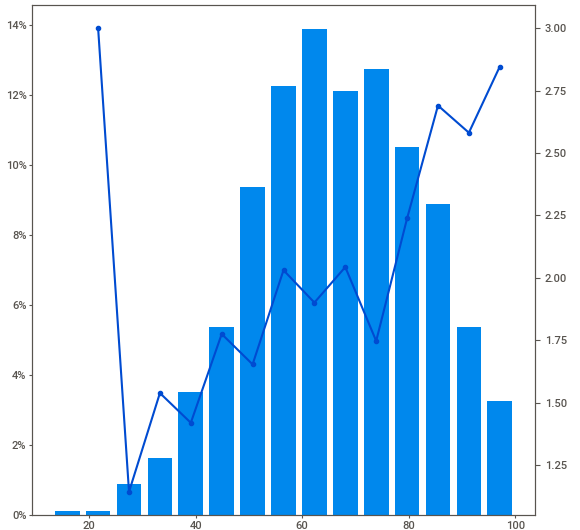
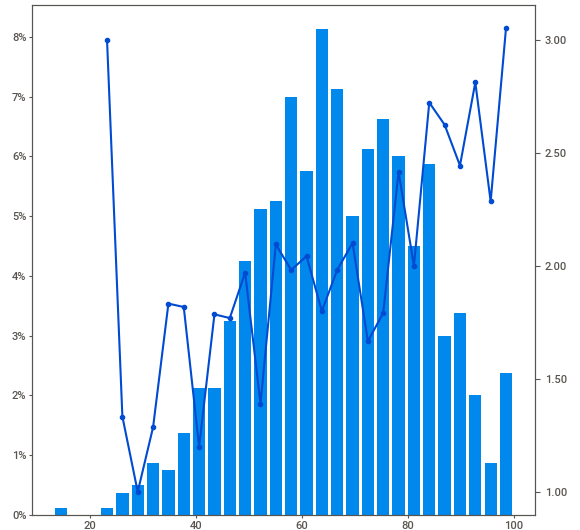
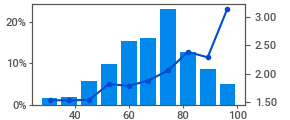
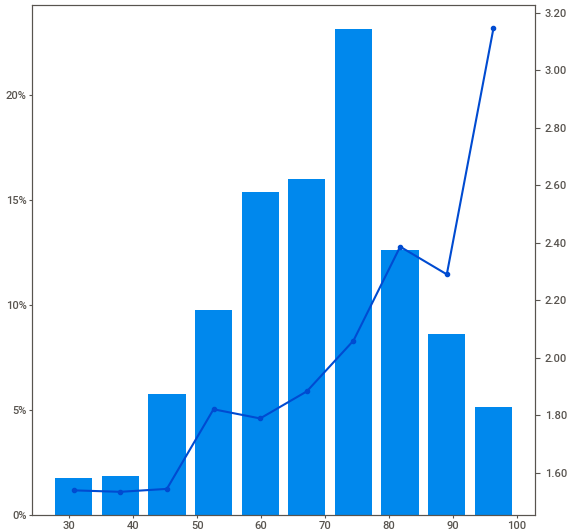
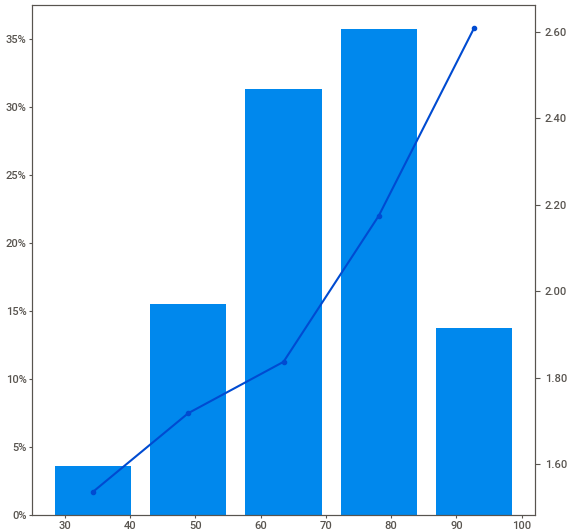
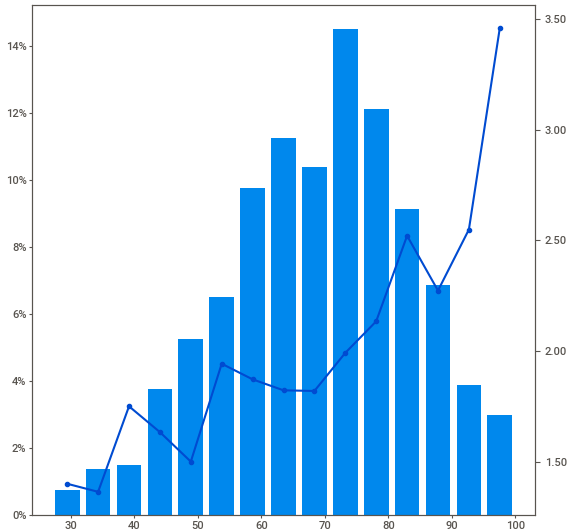
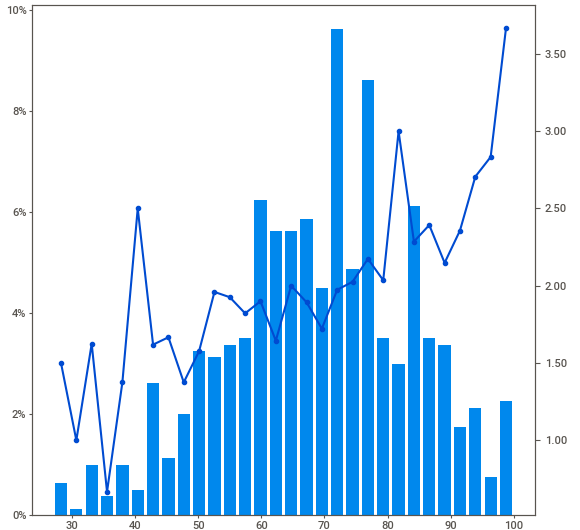
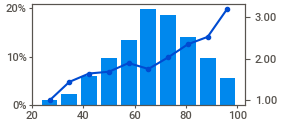
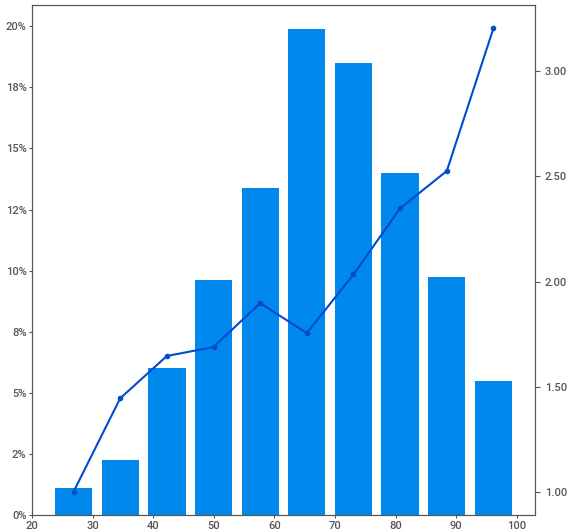
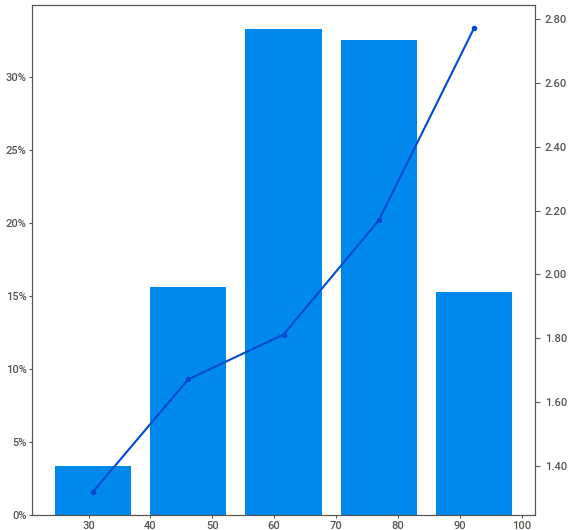
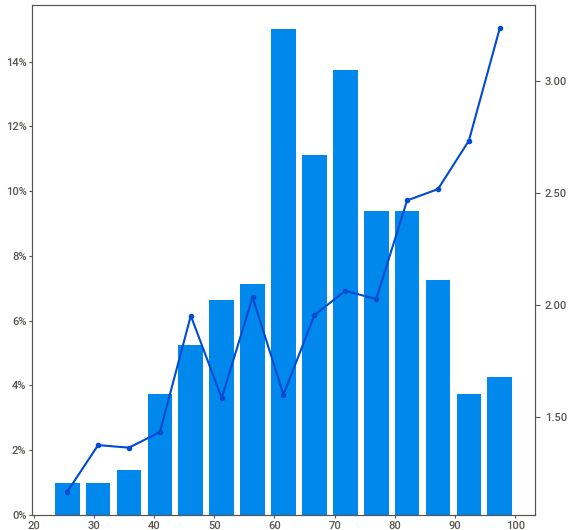
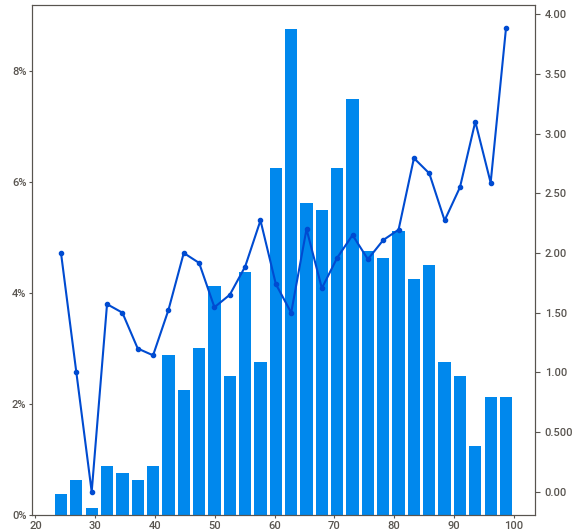
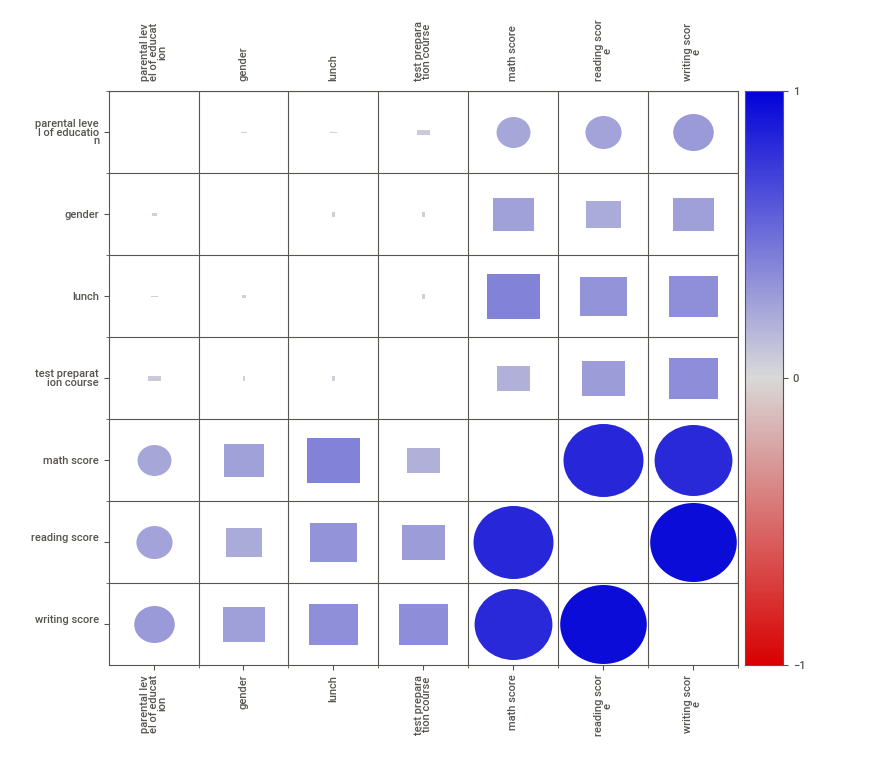
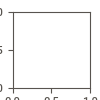

Report 'C:\Users\march\000 Treball Ju`yter 000\Hackathons\\-Hackathon_Talent_Squad_III_DS\train_EDA.html' was saved to storage.


In [8]:
#display the train report
acad_Yield_train_report.show_notebook( w=None, 
                                        h=None, 
                                        scale=None,
                                        layout='vertical',
                                        filepath='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\\-Hackathon_Talent_Squad_III_DS\\train_EDA.html')


In [9]:
comparison_report = sv.compare([acad_Yield_train, "Training Data"], [acad_Yield_test, "Test Data"], "parental level of education", feature_config)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



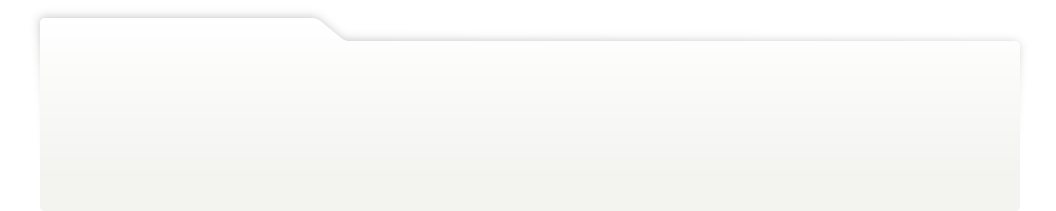
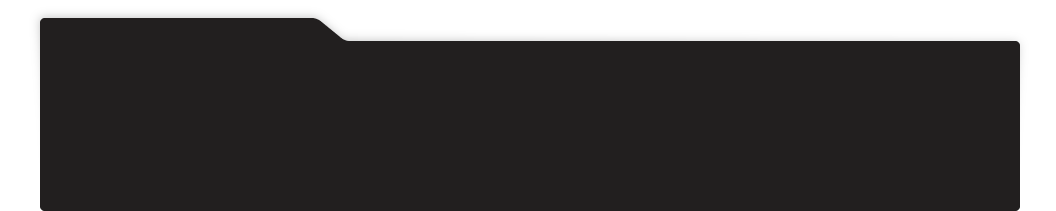
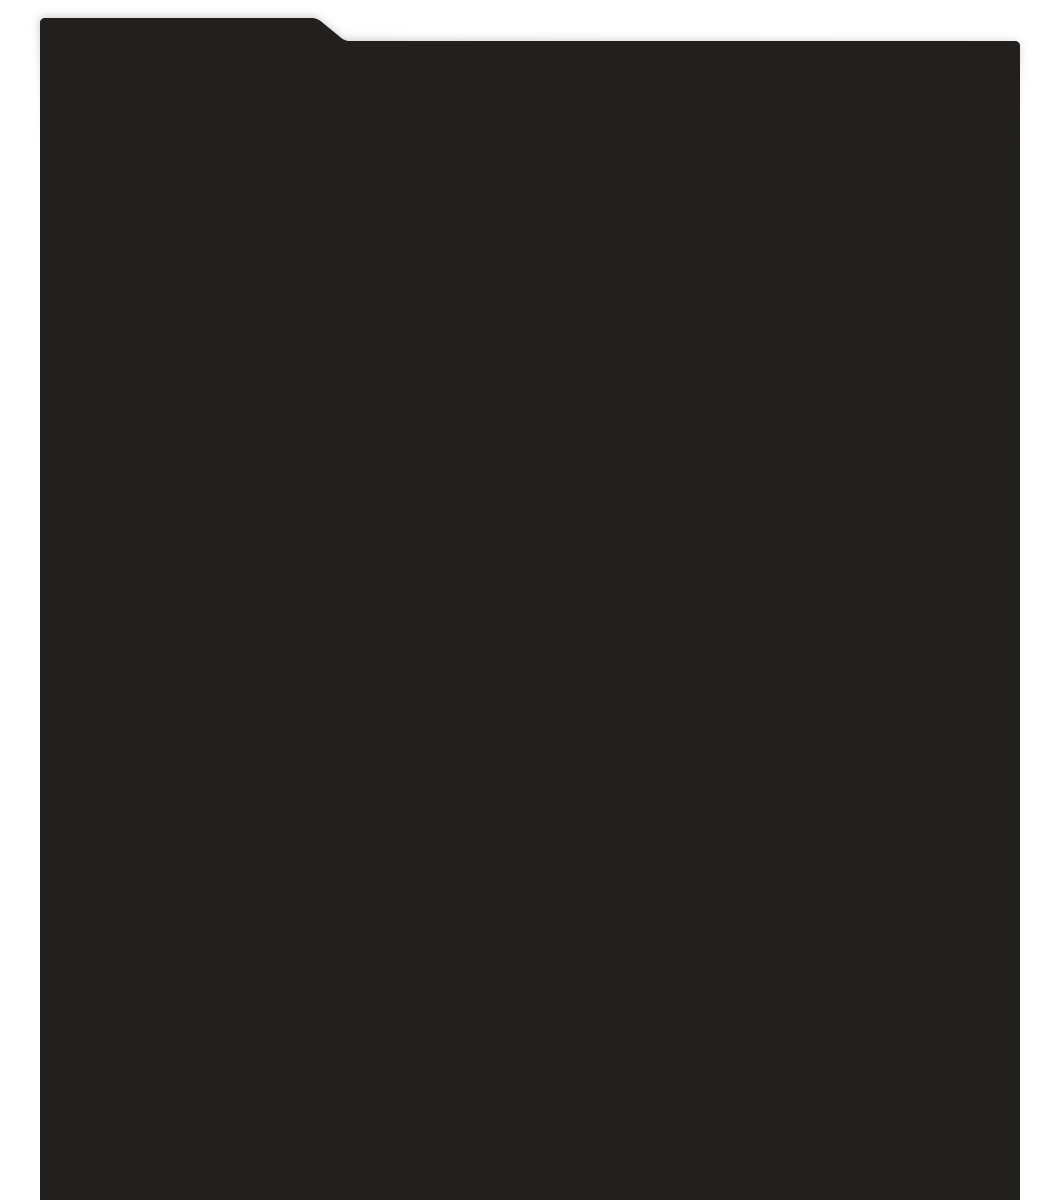
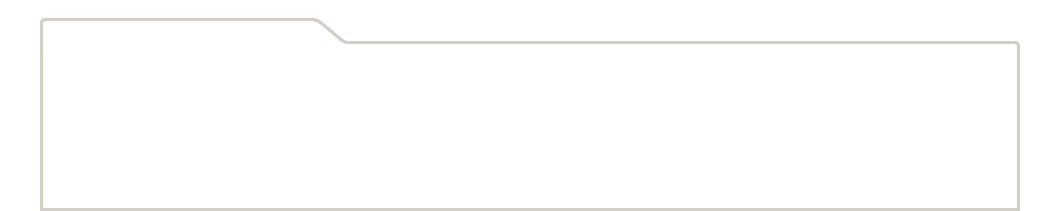
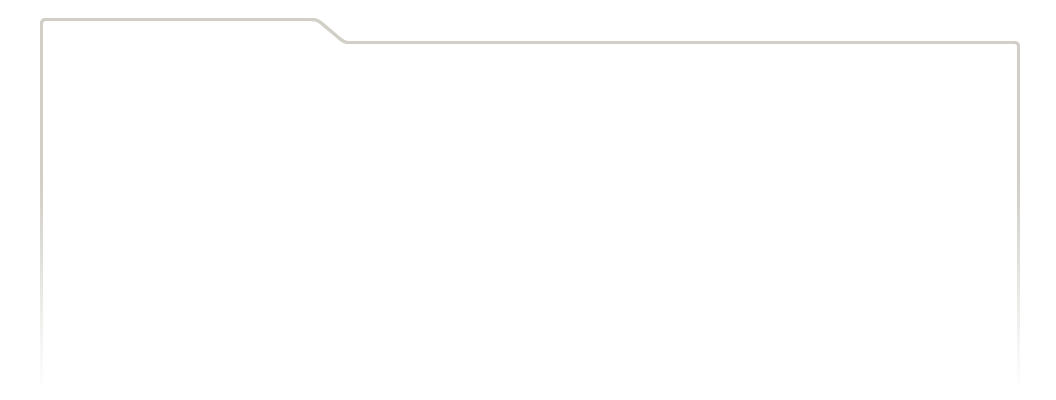
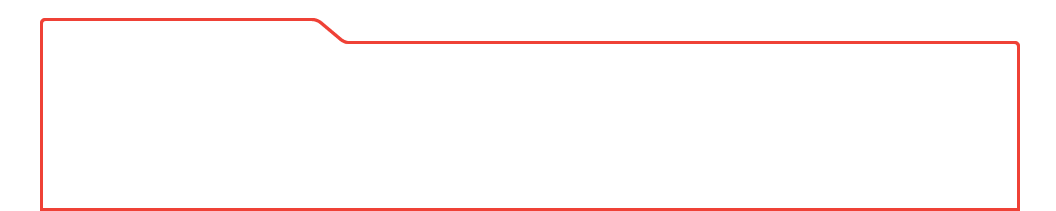
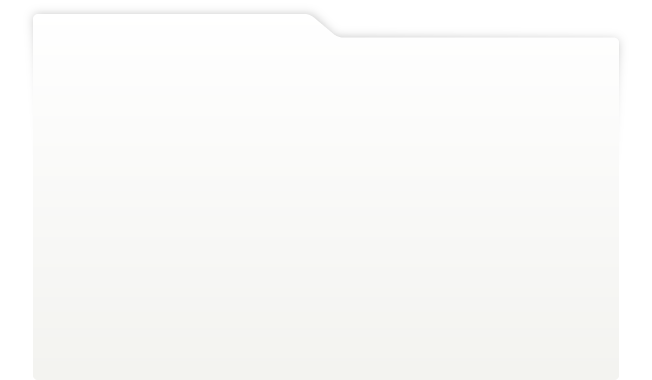
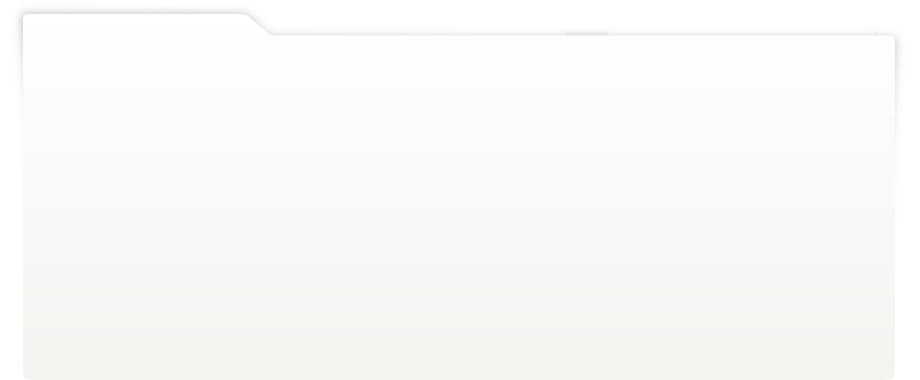
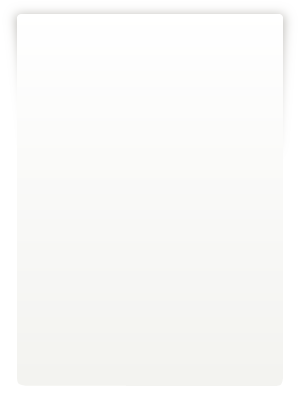
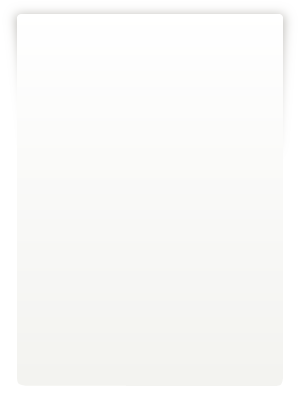
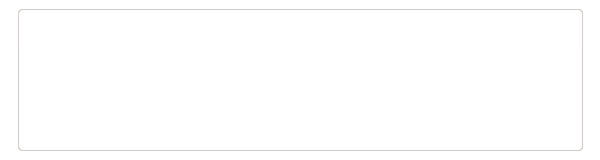
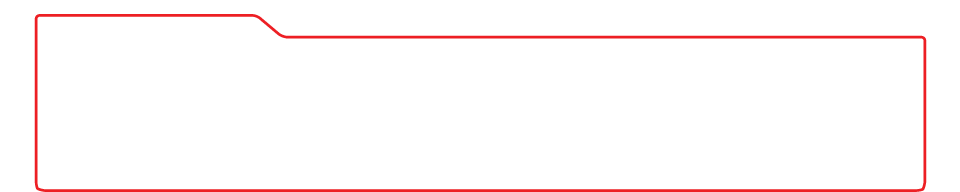
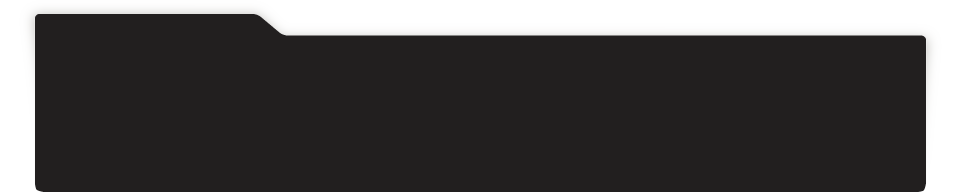
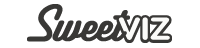
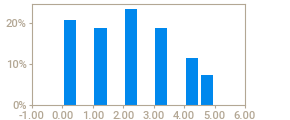
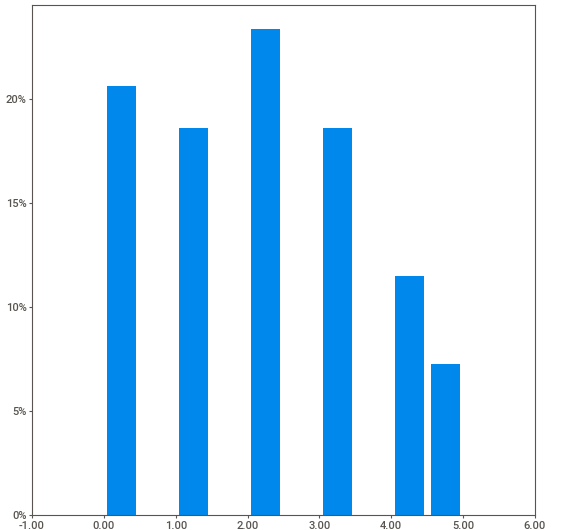
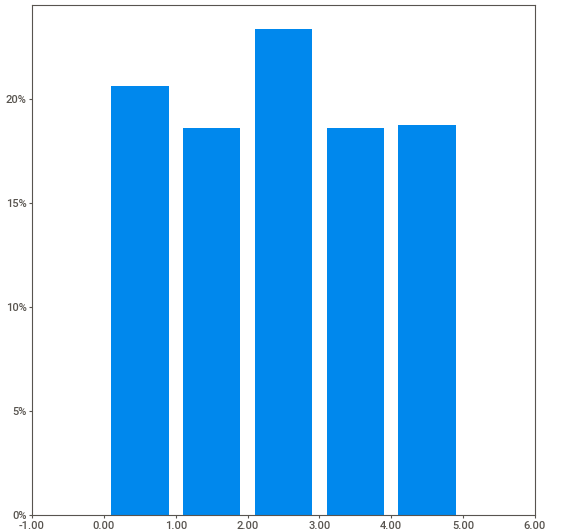
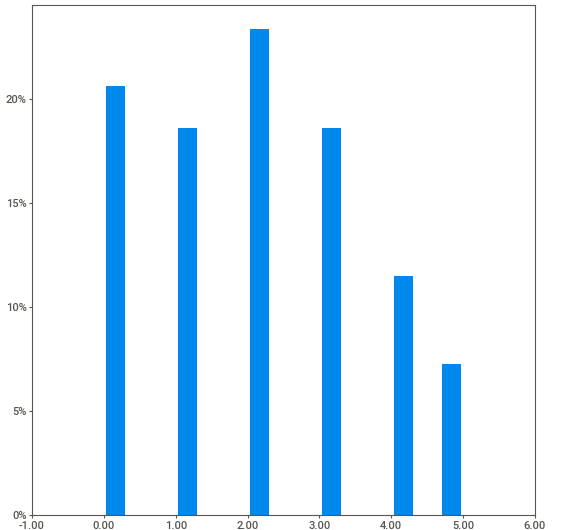
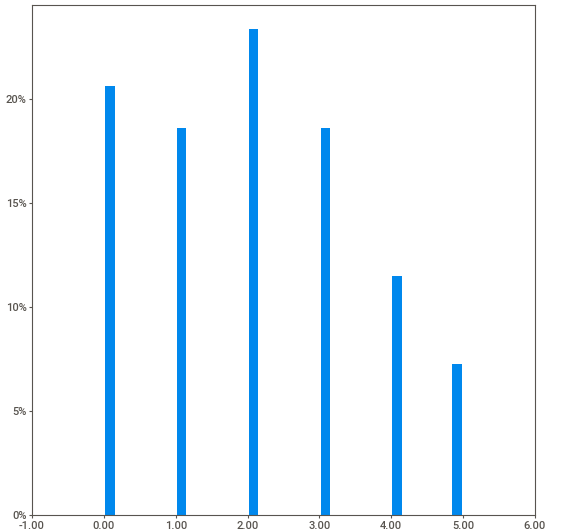
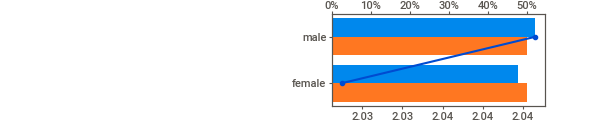
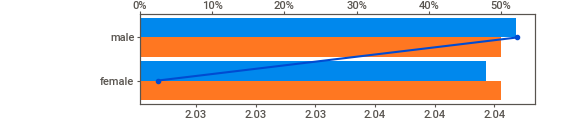
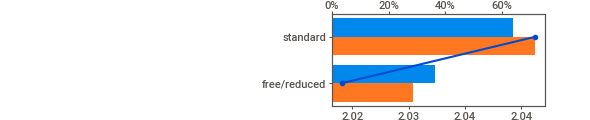
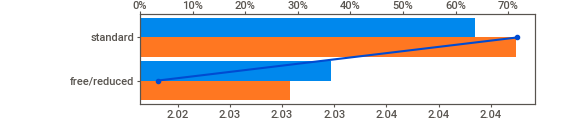
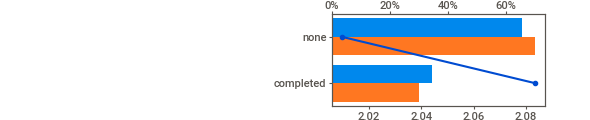
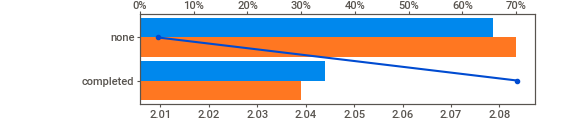
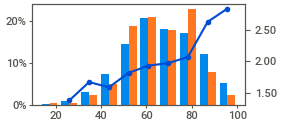
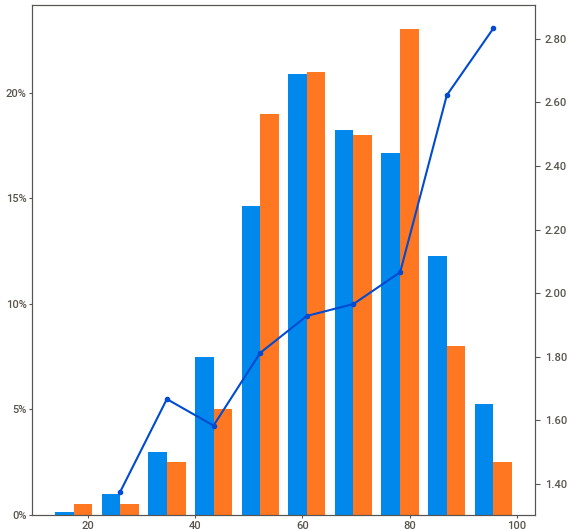
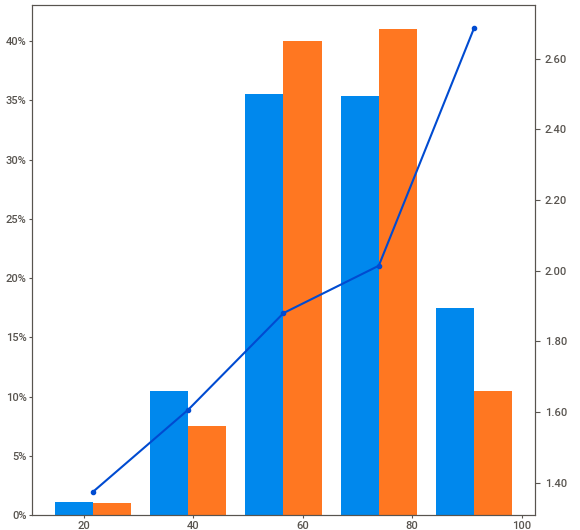
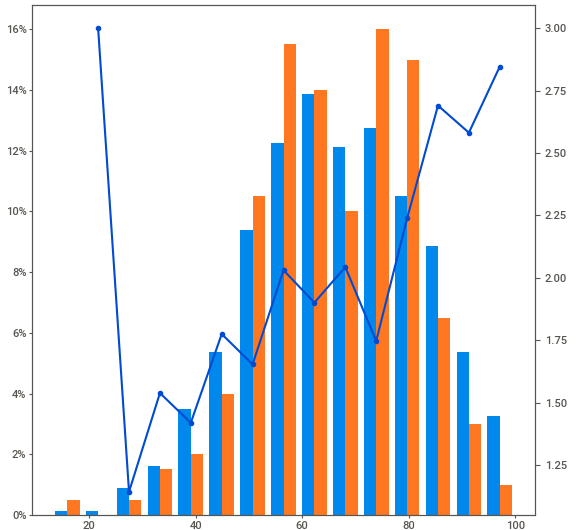
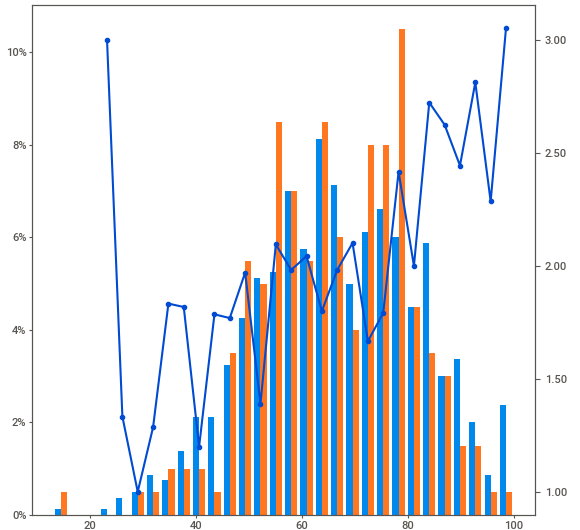
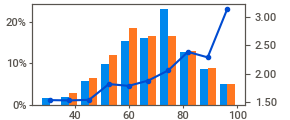
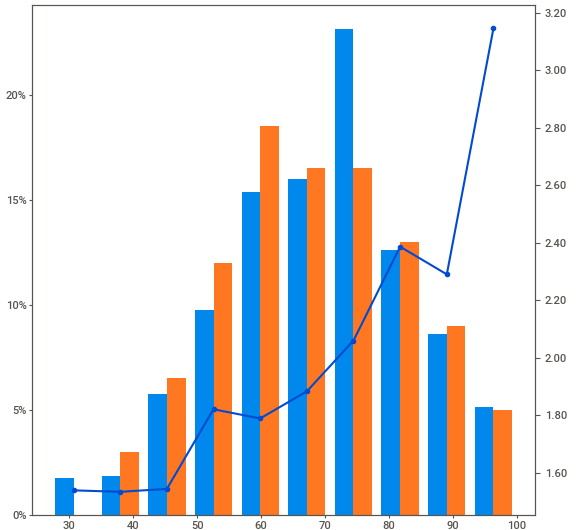
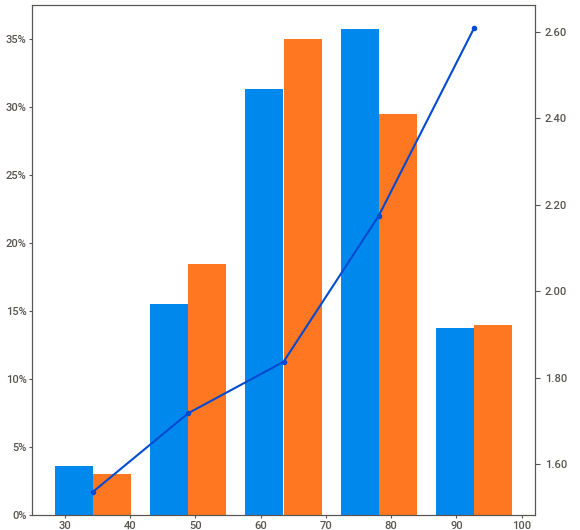
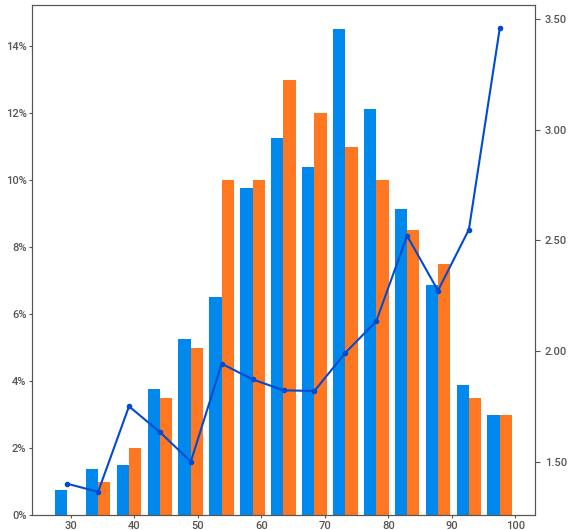
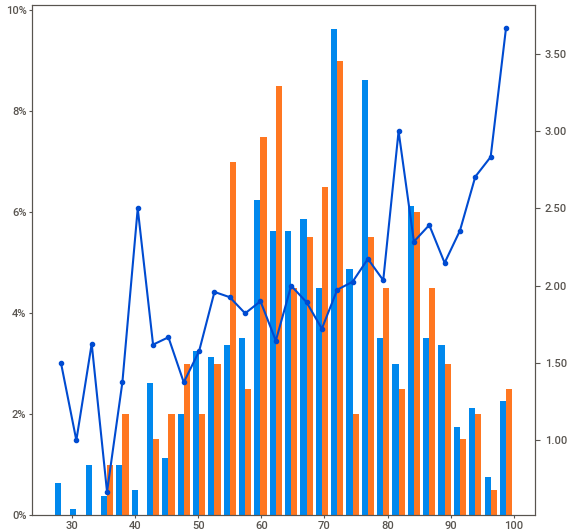
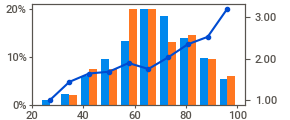
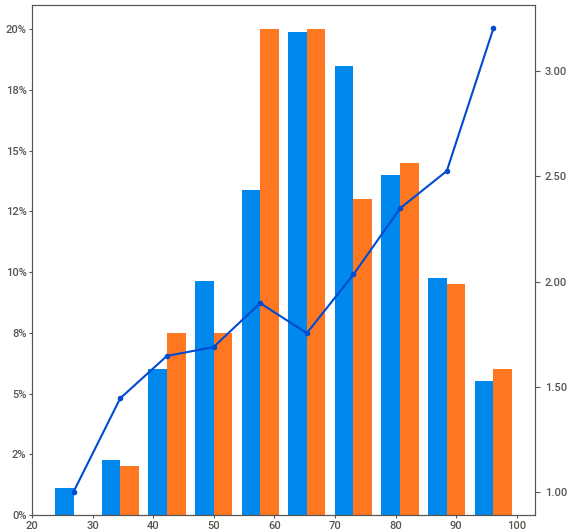
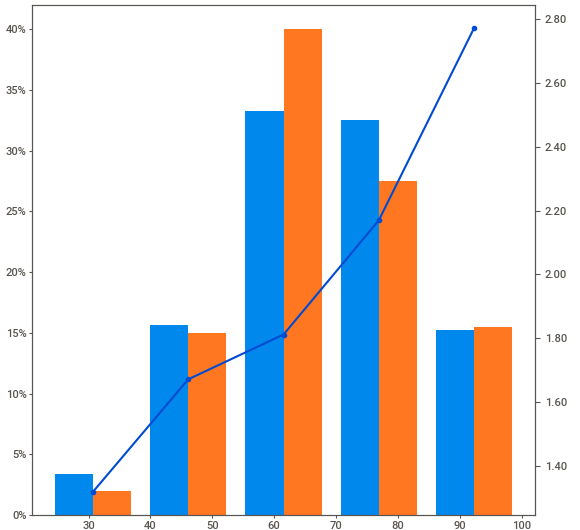
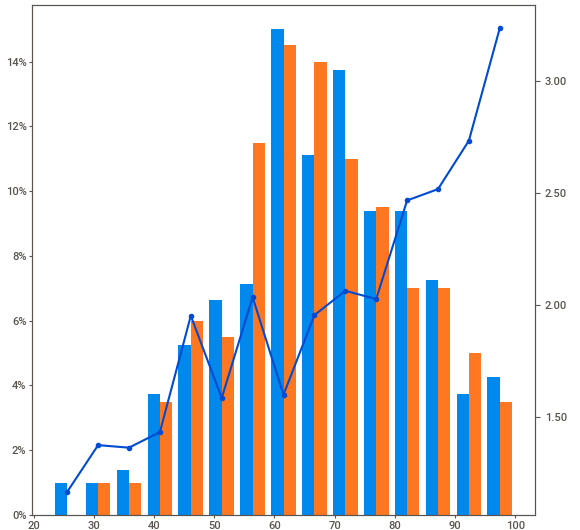
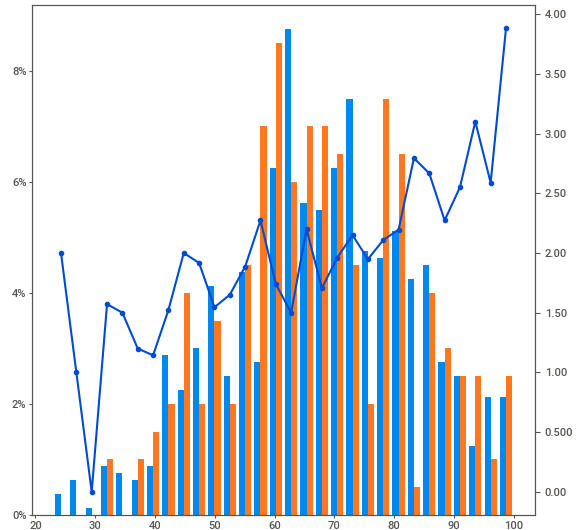
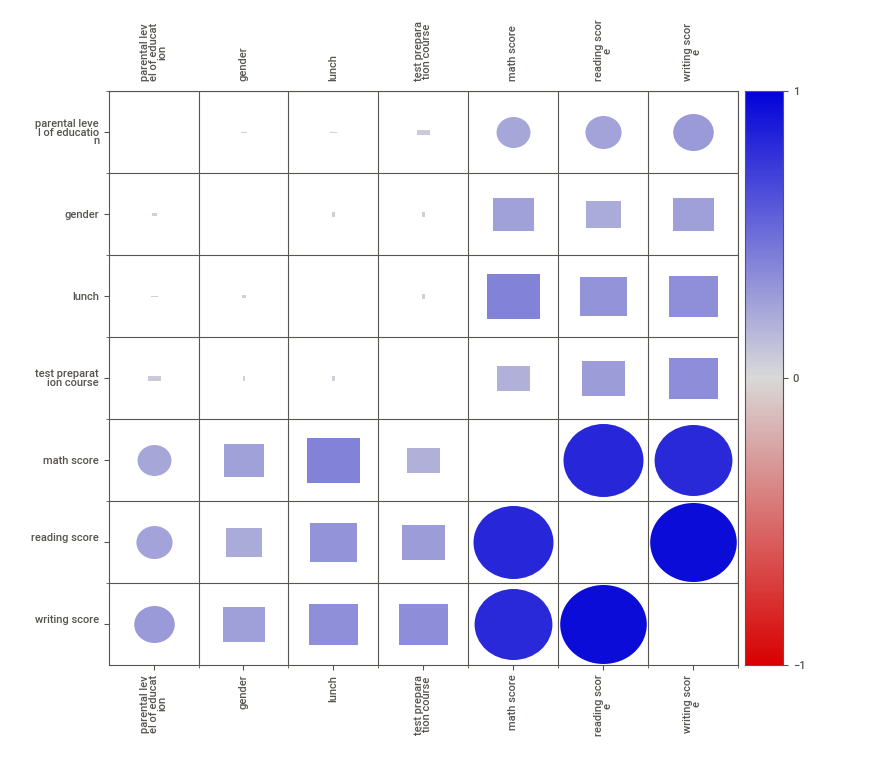
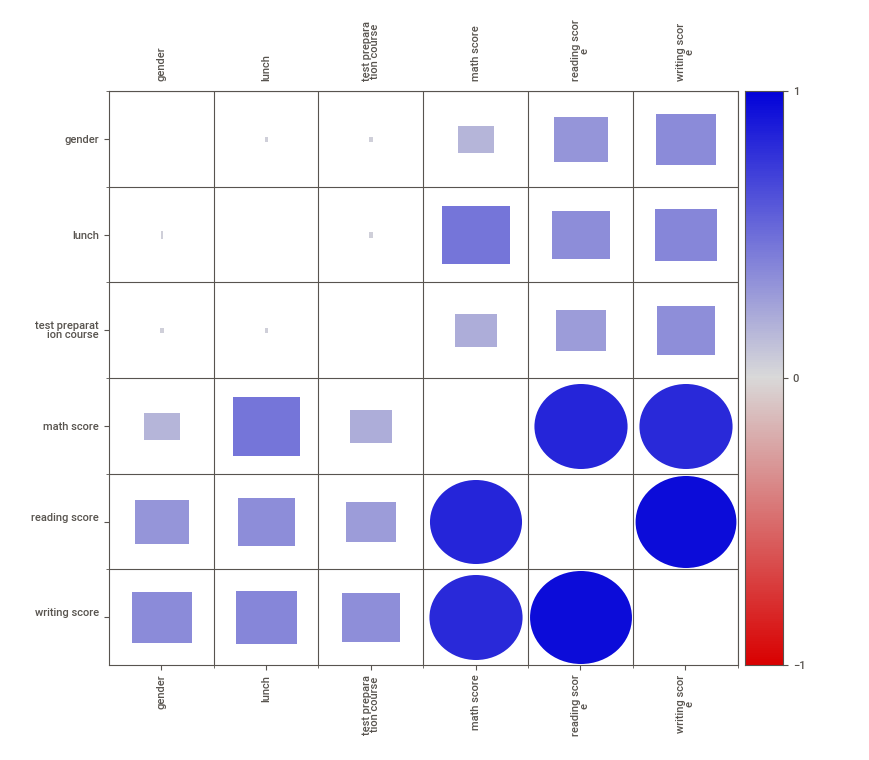

Report 'C:\Users\march\000 Treball Ju`yter 000\Hackathons\\-Hackathon_Talent_Squad_III_DS\test_vs_train_EDA.html' was saved to storage.


In [10]:
#display the train report
comparison_report.show_notebook( w=None, 
                                h=None, 
                                scale=None,
                                layout='vertical',
                                filepath='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\\-Hackathon_Talent_Squad_III_DS\\test_vs_train_EDA.html')

In [37]:
def df_dummies (df):
    new_df_with_dum = pd.get_dummies (acad_Yield_train,
                columns= ['gender',  
                'lunch',
                'test preparation course' ] 
                )
    for i in ['gender_male', 'lunch_standard', 'test preparation course_none']:
        new_df_with_dum.drop(i, axis=1, inplace=True)
    return new_df_with_dum

def avg_num_colmns (df):
    new_df= df.copy()
    new_df['average_score'] = (new_df['math score'] + new_df['reading score'] + new_df['writing score'])/3
    new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
    return new_df

def max_num_colmns (df):
    new_df= df.copy()
    new_df['max_score'] = [max (x) for x in zip(new_df['math score'] , new_df['reading score'] , new_df['writing score'])]
    new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
    return new_df


In [40]:

   def min_num_colmns (df):
        new_df= df.copy()
        new_df['min_score'] = [min (x) for x in zip(new_df['math score'] , new_df['reading score'] , new_df['writing score'])]
        new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
        return new_df 

In [16]:
acad_Yield_train_dum =  df_dummies(acad_Yield_train)


In [38]:
acad_Yield_train_dum_max = max_num_colmns(acad_Yield_train_dum)
acad_Yield_train_dum_max

,parental level of education,gender_female,lunch_free/reduced,test preparation course_completed,max_score
764,1,1,0,0,76
866,4,0,0,0,79
208,2,1,0,0,86
337,0,1,1,0,49
323,3,0,0,1,85
...,...,...,...,...,...
272,0,0,0,1,74
853,2,0,0,1,72
894,3,0,0,0,86
179,0,0,0,1,89


In [18]:
acad_Yield_train_dum_avg = avg_num_colmns(acad_Yield_train_dum)
acad_Yield_train_dum_avg

,parental level of education,gender_female,lunch_free/reduced,test preparation course_completed,average_score
764,1,1,0,0,68.333333
866,4,0,0,0,64.666667
208,2,1,0,0,82.333333
337,0,1,1,0,46.666667
323,3,0,0,1,83.333333
...,...,...,...,...,...
272,0,0,0,1,70.000000
853,2,0,0,1,72.000000
894,3,0,0,0,80.333333
179,0,0,0,1,87.333333


In [14]:
acad_Yield_train_dum.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'gender_male', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [21]:
acad_Yield_train_math=acad_Yield_train.copy()
acad_Yield_train_math.drop(['reading score', 'writing score'], axis= 1, inplace= True)
acad_Yield_train_math

,gender,parental level of education,lunch,test preparation course,math score
764,female,1,standard,none,62
866,male,4,standard,none,79
208,female,2,standard,none,77
337,female,0,free/reduced,none,45
323,male,3,standard,completed,82
...,...,...,...,...,...
272,male,0,standard,completed,74
853,male,2,standard,completed,72
894,male,3,standard,none,86
179,male,0,standard,completed,89


In [25]:
X = acad_Yield_train_dum.drop('parental level of education', axis = 1).values
y = acad_Yield_train_dum['parental level of education']

numerical_cols=['math score', 
                'reading score',       
                'writing score', 
                'gender_female', 
                'lunch_free/reduced',       
                'test preparation course_completed'
                ]


In [26]:
scaler = preprocessing.StandardScaler()
acad_Yield_train_std = scaler.fit_transform(X)
acad_Yield_train_std = pd.DataFrame(acad_Yield_train_std, columns =numerical_cols)

In [27]:
acad_Yield_train_std

,math score,reading score,writing score,gender_female,lunch_free/reduced,test preparation course_completed
0,-0.291354,0.463485,-0.053009,1.043443,-0.756115,-0.723747
1,0.791570,-0.819284,-0.625215,-0.958366,-0.756115,-0.723747
2,0.664167,1.138626,1.027826,1.043443,-0.756115,-0.723747
3,-1.374279,-1.561940,-1.197421,1.043443,1.322551,-0.723747
4,0.982674,0.936084,1.091404,-0.958366,-0.756115,1.381699
...,...,...,...,...,...,...
795,0.473063,0.125914,-0.180166,-0.958366,-0.756115,1.381699
796,0.345660,0.193428,0.264884,-0.958366,-0.756115,1.381699
797,1.237480,0.530999,0.646355,-0.958366,-0.756115,-0.723747
798,1.428584,1.206140,1.154983,-0.958366,-0.756115,1.381699


In [24]:
acad_Yield_train_dum.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'lunch_free/reduced',
       'test preparation course_completed'],
      dtype='object')

# 3. Screen models

With Pycaret, several models can be screened with few lines of code.

In [33]:
setup(acad_Yield_train,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2432,0.5596,0.2196,0.2472,0.2358,0.0667,0.0682,0.0250
nb,Naive Bayes,0.2093,0.5656,0.1921,0.1883,0.1741,0.0287,0.0306,0.0250
lda,Linear Discriminant Analysis,0.2056,0.5707,0.1886,0.1943,0.1935,0.0202,0.0208,0.0270
svm,SVM - Linear Kernel,0.2042,0.0000,0.1863,0.1532,0.1596,0.0209,0.0217,0.0600
lr,Logistic Regression,0.2021,0.5669,0.1816,0.1921,0.1881,0.0126,0.0130,1.8650
gbc,Gradient Boosting Classifier,0.2004,0.5231,0.1790,0.1985,0.1961,0.0170,0.0170,0.7830
rf,Random Forest Classifier,0.2002,0.5288,0.1765,0.1921,0.1927,0.0165,0.0168,0.4460
ada,Ada Boost Classifier,0.1986,0.5403,0.1821,0.1985,0.1883,0.0113,0.0114,0.1330
xgboost,Extreme Gradient Boosting,0.1950,0.5196,0.1736,0.1924,0.1907,0.0146,0.0146,0.3710
ridge,Ridge Classifier,0.1895,0.0000,0.1679,0.1924,0.1745,-0.0052,-0.0050,0.0260


In [19]:
setup(acad_Yield_train_dum_avg,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2325,0.5510,0.2065,0.2313,0.2231,0.0512,0.0519,0.0240
knn,K Neighbors Classifier,0.2165,0.5341,0.1845,0.1976,0.1963,0.0281,0.0290,0.0950
ada,Ada Boost Classifier,0.2129,0.5293,0.1900,0.2236,0.1965,0.0237,0.0244,0.0900
dt,Decision Tree Classifier,0.2093,0.5152,0.1818,0.1973,0.2001,0.0298,0.0298,0.0230
rf,Random Forest Classifier,0.1969,0.5264,0.1712,0.1902,0.1901,0.0178,0.0180,0.4000
lda,Linear Discriminant Analysis,0.1949,0.5561,0.1718,0.1799,0.1789,0.0016,0.0016,0.0210
lr,Logistic Regression,0.1931,0.5570,0.1673,0.1762,0.1750,-0.0029,-0.0029,1.3120
svm,SVM - Linear Kernel,0.1931,0.0000,0.1789,0.1421,0.1412,0.0109,0.0138,0.0520
lightgbm,Light Gradient Boosting Machine,0.1930,0.5223,0.1762,0.1888,0.1858,0.0115,0.0117,0.1920
nb,Naive Bayes,0.1896,0.5503,0.1642,0.1711,0.1670,-0.0073,-0.0075,0.0200


In [22]:
setup(acad_Yield_train_math,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2128,0.5345,0.1835,0.2155,0.2031,0.0232,0.0237,0.0260
rf,Random Forest Classifier,0.2092,0.5110,0.1882,0.2013,0.2006,0.0313,0.0317,0.3990
lightgbm,Light Gradient Boosting Machine,0.2056,0.5176,0.1850,0.2033,0.1992,0.0279,0.0284,0.2260
svm,SVM - Linear Kernel,0.2040,0.0000,0.1829,0.1190,0.1376,0.0197,0.0198,0.0620
et,Extra Trees Classifier,0.2040,0.5156,0.1788,0.1866,0.1882,0.0173,0.0178,0.3500
xgboost,Extreme Gradient Boosting,0.2038,0.5070,0.1848,0.1987,0.1984,0.0277,0.0278,0.2460
dt,Decision Tree Classifier,0.1949,0.5103,0.1704,0.1767,0.1803,0.0076,0.0080,0.0210
knn,K Neighbors Classifier,0.1931,0.5051,0.1703,0.1906,0.1803,-0.0008,-0.0006,0.0960
nb,Naive Bayes,0.1896,0.5391,0.1647,0.1920,0.1691,-0.0092,-0.0102,0.0190
lda,Linear Discriminant Analysis,0.1878,0.5504,0.1628,0.1729,0.1694,-0.0101,-0.0105,0.0230


In [28]:
acad_Yield_train_std['parental level of education'] = acad_Yield_train['parental level of education']

In [29]:
setup(acad_Yield_train_std,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.2537,0.0000,0.1945,0.1749,0.2038,0.0453,0.0479,0.0220
lr,Logistic Regression,0.2445,0.5426,0.1878,0.1689,0.1973,0.0337,0.0356,1.2800
nb,Naive Bayes,0.2441,0.5266,0.1903,0.1668,0.1921,0.0412,0.0445,0.0260
lda,Linear Discriminant Analysis,0.2422,0.5394,0.1881,0.1741,0.2001,0.0342,0.0360,0.0220
ada,Ada Boost Classifier,0.2351,0.5188,0.1912,0.2030,0.2111,0.0416,0.0430,0.0910
gbc,Gradient Boosting Classifier,0.2215,0.5478,0.1842,0.2161,0.2130,0.0307,0.0309,0.4660
dt,Decision Tree Classifier,0.2212,0.5231,0.2007,0.2350,0.2206,0.0457,0.0464,0.0230
lightgbm,Light Gradient Boosting Machine,0.2192,0.5298,0.1879,0.2105,0.2127,0.0319,0.0322,0.1740
xgboost,Extreme Gradient Boosting,0.2101,0.5283,0.1755,0.1903,0.1950,0.0220,0.0225,0.2630
svm,SVM - Linear Kernel,0.1942,0.0000,0.1628,0.1382,0.1418,0.0025,0.0027,0.0590


In [39]:
setup(acad_Yield_train_dum_max,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.2307,0.5326,0.2021,0.2198,0.2151,0.0484,0.0498,0.2260
qda,Quadratic Discriminant Analysis,0.2164,0.5559,0.1916,0.2124,0.2078,0.0316,0.0320,0.0330
ada,Ada Boost Classifier,0.2021,0.5253,0.1780,0.1985,0.1889,0.0122,0.0128,0.1260
et,Extra Trees Classifier,0.2003,0.5176,0.1732,0.1716,0.1794,0.0133,0.0135,0.4230
dt,Decision Tree Classifier,0.1968,0.5053,0.1697,0.1732,0.1778,0.0088,0.0086,0.0250
gbc,Gradient Boosting Classifier,0.1967,0.5278,0.1764,0.1868,0.1846,0.0134,0.0138,0.6510
rf,Random Forest Classifier,0.1896,0.5210,0.1705,0.1824,0.1824,0.0094,0.0096,0.5240
nb,Naive Bayes,0.1879,0.5539,0.1625,0.1756,0.1687,-0.0089,-0.0095,0.0280
lightgbm,Light Gradient Boosting Machine,0.1860,0.5241,0.1650,0.1800,0.1772,0.0029,0.0030,0.2540
lr,Logistic Regression,0.1842,0.5542,0.1633,0.1842,0.1720,-0.0132,-0.0135,2.2510


In [ ]:
acad_Yield_train_dum_max

# 6. Results & Conclusions

# 7. References

# 8. Other

In [93]:
# Saving in a text file all installed libraries in the environment used to run this project.
!pip freeze > requirements.txt 